# Evaluation of Graph Neural Network segment classifier

In [1]:
# Concurrency config
import os
os.environ['OMP_NUM_THREADS'] = '4'

In [2]:
# Notebook utils
from nb_utils import (get_test_data_loader, load_config, load_summaries,
                      load_model, apply_model, compute_metrics,
                      plot_train_history, draw_sample, plot_metrics)

In [3]:
%matplotlib inline

In [4]:
# Config path
config_file = '../configs/segclf_big.yaml'

In [5]:
!cat $config_file

output_dir: ${SCRATCH}/heptrkx/results/gnnsegclf_big_003

trainer:
    name: gnn
    real_weight: 5.0   # 0.5 / 0.1
    fake_weight: 0.555 # 0.5 / 0.9

data:
    name: hitgraphs
    input_dir: ${SCRATCH}/heptrkx/data/hitgraphs_big_000
    n_train: 16384
    n_valid: 1024
    batch_size: 1
    n_workers: 4

model:
    name: 'gnn_segment_classifier'
    input_dim: 3
    hidden_dim: 64
    n_iters: 8
    loss_func: 'binary_cross_entropy'
    optimizer: 'Adam'
    learning_rate: 0.001

training:
    n_epochs: 64


In [6]:
config = load_config(config_file)
summaries = load_summaries(config)

In [7]:
summaries

,epoch,lr,train_loss,train_time,valid_acc,valid_loss,valid_time
0,0,0.001,0.329274,2610.476918,0.930692,0.163230,130.013162
1,1,0.001,0.152179,2601.884538,0.953935,0.117196,129.127969
2,2,0.001,0.117361,2600.857374,0.960427,0.108413,131.774058
3,3,0.001,0.105416,2589.314290,0.959792,0.107899,129.223091
4,4,0.001,0.095180,2619.323370,0.966222,0.092914,130.692354
5,5,0.001,0.090708,2600.917249,0.969481,0.086298,128.546390
6,6,0.001,0.087207,2592.280767,0.965430,0.093308,130.134247
7,7,0.001,0.084853,2594.736212,0.969635,0.084506,129.978837
8,8,0.001,0.082515,2632.234557,0.977351,0.067307,131.082608
9,9,0.001,0.081414,2603.433692,0.978077,0.064174,129.673371


## Plot the Training loss and accuracy

In [8]:
import matplotlib.pyplot as plt

def plot_train_history(summaries, figsize=(12, 5)):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=figsize)

    # Plot losses
    ax0.plot(summaries.epoch, summaries.train_loss, label='Train')
    ax0.plot(summaries.epoch, summaries.valid_loss, label='Validation')
    ax0.set_yscale('log')
    ax0.set_xlabel('Epoch')
    ax0.set_ylabel('Loss')
    ax0.legend(loc=0)

    # Plot accuracies
    ax1.plot(summaries.epoch, summaries.valid_acc, label='Validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(bottom=0, top=1)
    ax1.legend(loc=0)

    plt.tight_layout()

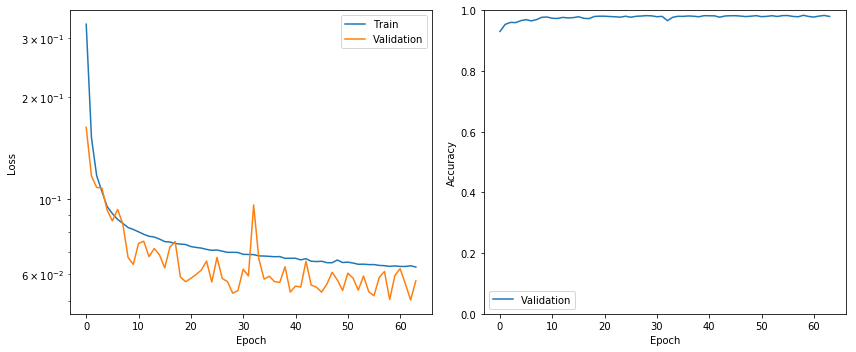

In [9]:
plot_train_history(summaries)

## Load the trained model

In [10]:
# Find the best epoch
best_summary = summaries.loc[[summaries.valid_loss.idxmin()]]
best_summary

,epoch,lr,train_loss,train_time,valid_acc,valid_loss,valid_time
62,62,0.001,0.063583,2647.705483,0.983321,0.050371,130.136895


In [21]:
# Load model from best epoch
model = load_model(config, reload_epoch=best_summary.epoch).eval()

print(model)
print('Parameters: %i' % sum(p.numel() for p in model.parameters()))

GNNSegmentClassifier(
  (input_network): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): Tanh()
  )
  (edge_network): EdgeNetwork(
    (network): Sequential(
      (0): Linear(in_features=134, out_features=64, bias=True)
      (1): LayerNorm(torch.Size([64]), eps=1e-05, elementwise_affine=True)
      (2): Tanh()
      (3): Linear(in_features=64, out_features=64, bias=True)
      (4): LayerNorm(torch.Size([64]), eps=1e-05, elementwise_affine=True)
      (5): Tanh()
      (6): Linear(in_features=64, out_features=64, bias=True)
      (7): LayerNorm(torch.Size([64]), eps=1e-05, elementwise_affine=True)
      (8): Tanh()
      (9): Linear(in_features=64, out_features=1, bias=True)
      (10): Sigmoid()
    )
  )
  (node_network): NodeNetwork(
    (network): Sequential(
      (0): Linear(in_features=201, out_features=64, bias=True)
      (1): LayerNorm(torch.Size([64]), eps=1e-05, elementwise_affine=True)
      (2): Tanh()
      (3): Linear(in_features=64, out

## Load the test data set

In [13]:
n_test = 32
test_loader = get_test_data_loader(config, n_test=n_test)

## Evaluate the model on the test dataset

In [14]:
%%time
test_preds, test_targets = apply_model(model, test_loader)

CPU times: user 3min 25s, sys: 14 s, total: 3min 39s
Wall time: 55.7 s


In [15]:
threshold = 0.5
test_metrics = compute_metrics(test_preds, test_targets, threshold=threshold)

print('Test set results with threshold of', threshold)
print('Accuracy:  %.4f' % test_metrics.accuracy)
print('Precision: %.4f' % test_metrics.precision)
print('Recall:    %.4f' % test_metrics.recall)

Test set results with threshold of 0.5
Accuracy:  0.9832
Precision: 0.8409
Recall:    0.9649


In [16]:
threshold = 0.7
test_metrics = compute_metrics(test_preds, test_targets, threshold=threshold)

print('Test set results with threshold of', threshold)
print('Accuracy:  %.4f' % test_metrics.accuracy)
print('Precision: %.4f' % test_metrics.precision)
print('Recall:    %.4f' % test_metrics.recall)

Test set results with threshold of 0.7
Accuracy:  0.9883
Precision: 0.9024
Recall:    0.9518


In [17]:
threshold = 0.8
test_metrics = compute_metrics(test_preds, test_targets, threshold=threshold)

print('Test set results with threshold of', threshold)
print('Accuracy:  %.4f' % test_metrics.accuracy)
print('Precision: %.4f' % test_metrics.precision)
print('Recall:    %.4f' % test_metrics.recall)

Test set results with threshold of 0.8
Accuracy:  0.9899
Precision: 0.9295
Recall:    0.9410


In [18]:
threshold = 0.9
test_metrics = compute_metrics(test_preds, test_targets, threshold=threshold)

print('Test set results with threshold of', threshold)
print('Accuracy:  %.4f' % test_metrics.accuracy)
print('Precision: %.4f' % test_metrics.precision)
print('Recall:    %.4f' % test_metrics.recall)

Test set results with threshold of 0.9
Accuracy:  0.9911
Precision: 0.9638
Recall:    0.9191


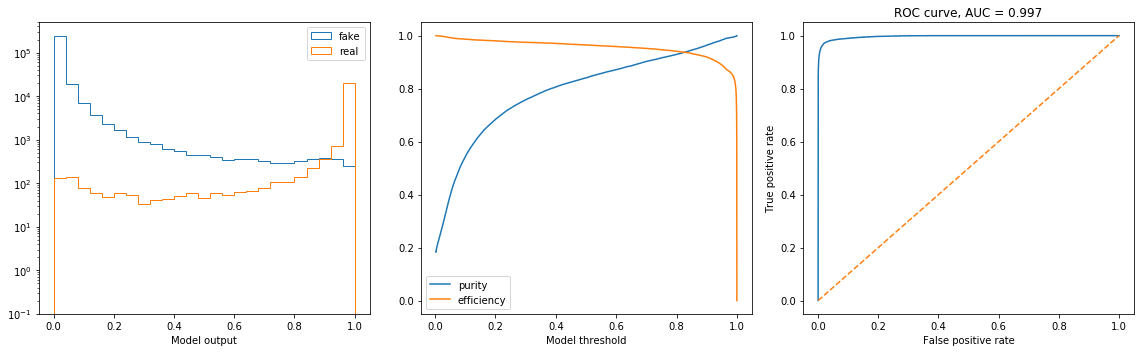

In [19]:
plot_metrics(test_preds, test_targets, test_metrics)

## Visualize predictions

CPU times: user 5min 54s, sys: 1.88 s, total: 5min 56s
Wall time: 5min 56s


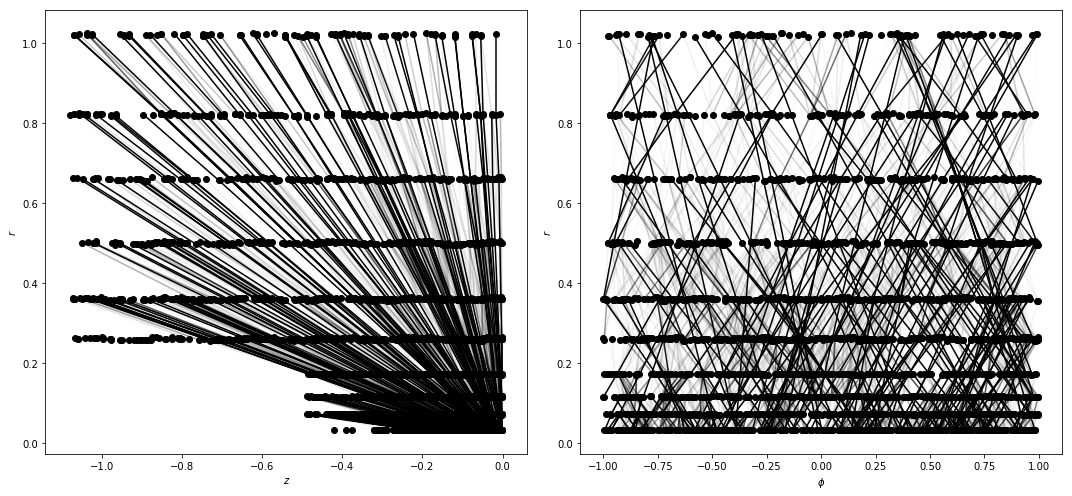

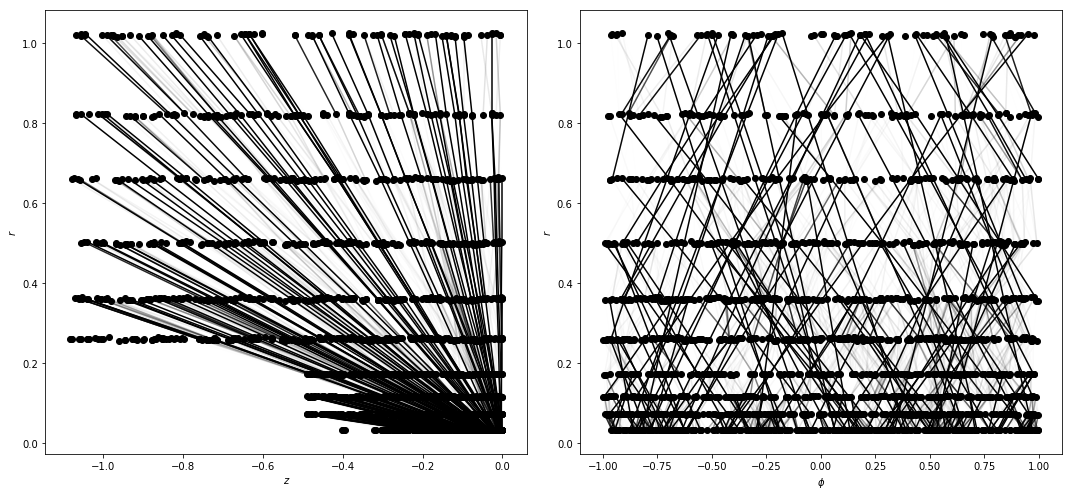

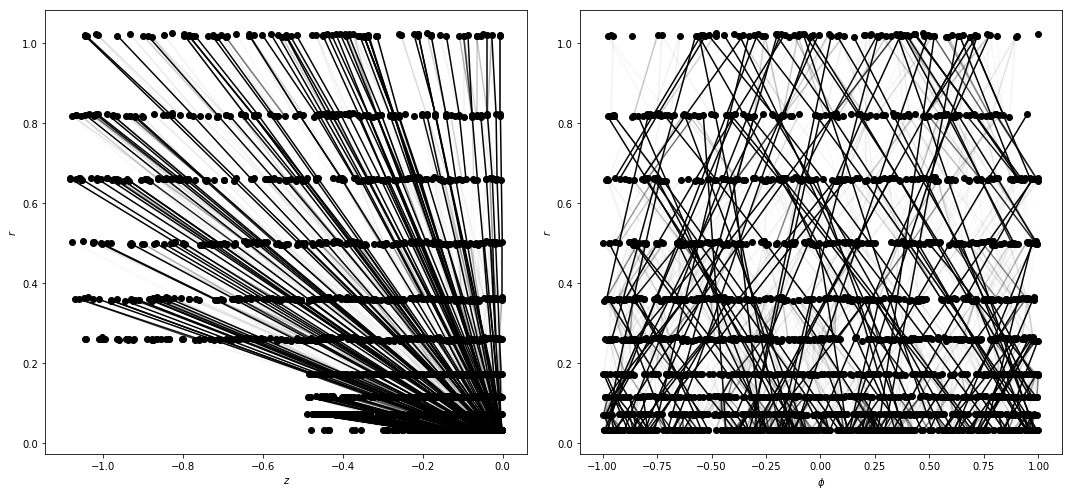

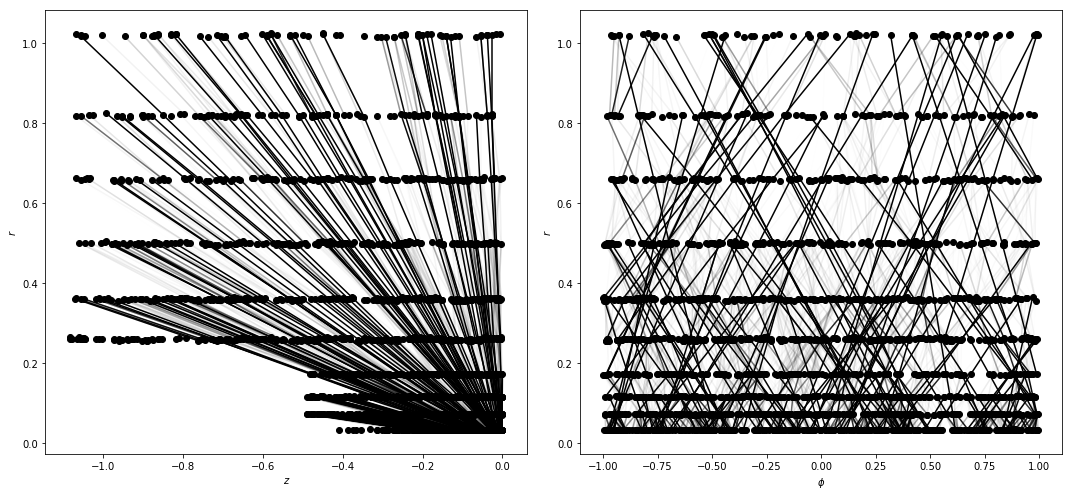

In [20]:
%%time

n_draw = 4
for i in range(n_draw):
    X, Ri, Ro, y = test_loader.dataset[i]
    pred = test_preds[i].numpy()
    draw_sample(X, Ri, Ro, pred, alpha_labels=True)